In [122]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as stats


In [123]:
employe_df = pd.read_csv('data/conjunto_de_dados_de_funcionarios.csv')

In [124]:
employe_df.shape

(4653, 9)

In [125]:
employe_df.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [126]:
employe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [127]:
employe_df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [128]:
# employe_df['EverBenched'] = employe_df['EverBenched'].apply(lambda x: 1 if x == 'Yes' else 0)

In [129]:
employe_df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [130]:
#Qual o ano de maior e menor número na contratação de funcionários? (Qual o ano com a maior e menor quantidade na contratação dos funcionários?)
maior_ano_contratacao = employe_df['JoiningYear'].value_counts().idxmax()
maior_numero_funcionarios = employe_df['JoiningYear'].value_counts().max()
print('Maior ano: ' + str(maior_ano_contratacao) + ' com um total de ' + str(maior_numero_funcionarios) + ' funcionarios.')

menor_ano_contratacao = employe_df['JoiningYear'].value_counts().idxmin()
menor_numero_funcionarios = employe_df['JoiningYear'].value_counts().min()
print('Menor ano: ' + str(menor_ano_contratacao) + ' com um total de ' + str(menor_numero_funcionarios) + ' funcionarios.')

Maior ano: 2017 com um total de 1108 funcionarios.
Menor ano: 2018 com um total de 367 funcionarios.


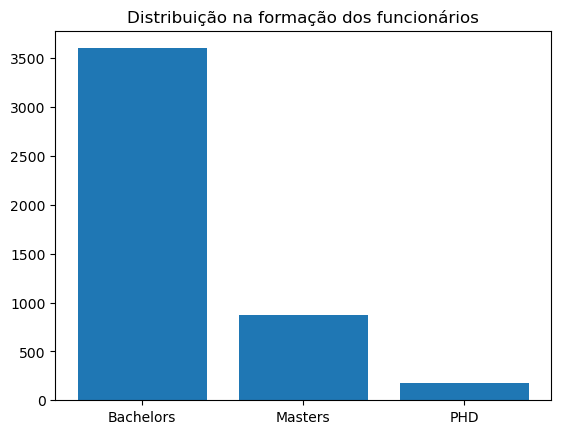

In [131]:
#Como é o comportamento da distribuição na formação dos funcionários? (Pode-se usar o gráfico de colunas ou de pizza)
education_counts = employe_df['Education'].value_counts()
plt.bar(education_counts.index, education_counts)
plt.title('Distribuição na formação dos funcionários')
plt.show()

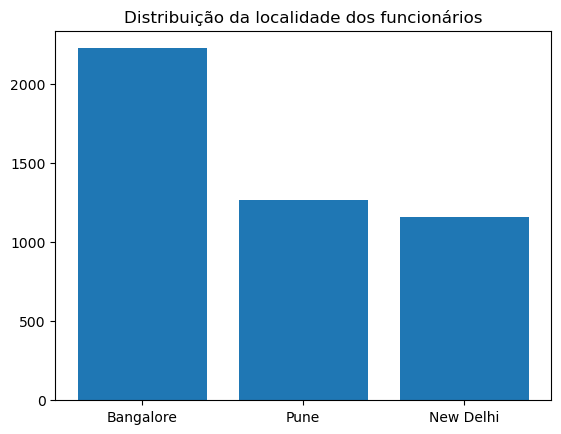

In [132]:
#Como é a distribuição da localidade dos funcionários? (Pode-se usar o gráfico de colunas ou de pizza)
city_counts = employe_df['City'].value_counts()
plt.bar(city_counts.index, city_counts)
plt.title('Distribuição da localidade dos funcionários')
plt.show()

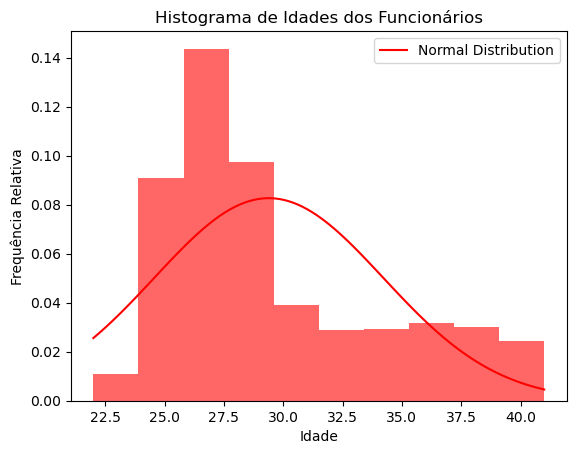

In [171]:
#A idade dos funcionários, tem um comportamento próximo a uma distribuição normal? (Pode-se usar o histograma para verificação)
plt.hist(employe_df['Age'], bins=10, density=True, alpha=0.6, color='r')
media = employe_df['Age'].mean()
desvio_padrao = employe_df['Age'].std()

x = np.linspace(employe_df['Age'].min(), employe_df['Age'].max(), 100)

plot = stats.norm.pdf(x, loc=media, scale=desvio_padrao)
plt.plot(x, pdf, 'r-', label='Normal Distribution')
plt.xlabel('Idade')
plt.ylabel('Frequência Relativa')
plt.title('Histograma de Idades dos Funcionários')
plt.legend()
plt.show()

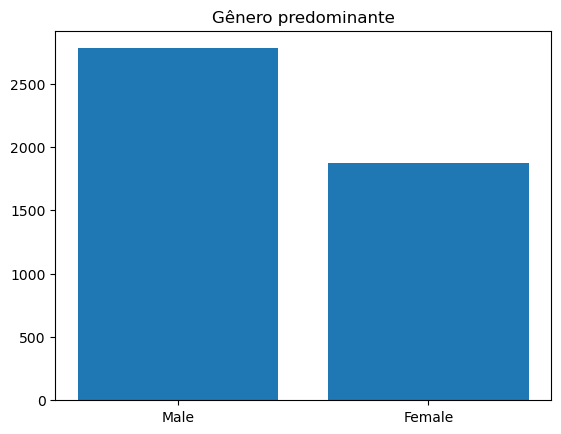

In [134]:
#Qual o gênero predominante? (Pode-se usar o gráfico de colunas ou de pizza)
gender_counts = employe_df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts)
plt.title('Gênero predominante')
plt.show()

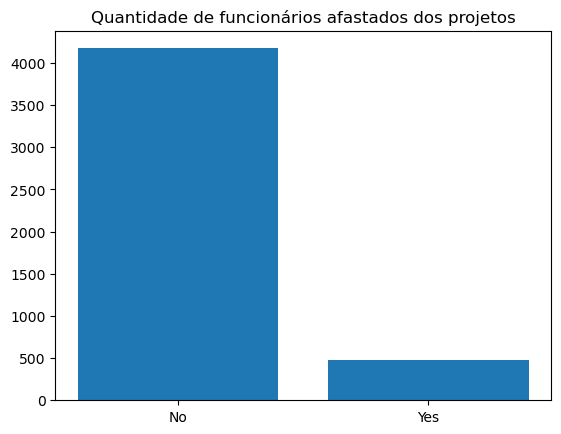

In [135]:
#A quantidade de funcionários afastados dos projetos é relevante? (Pode-se usar o gráfico de colunas ou de pizza)
ever_benched_counts = employe_df['EverBenched'].value_counts()
plt.bar(ever_benched_counts.index, ever_benched_counts)
plt.title('Quantidade de funcionários afastados dos projetos')
plt.show()

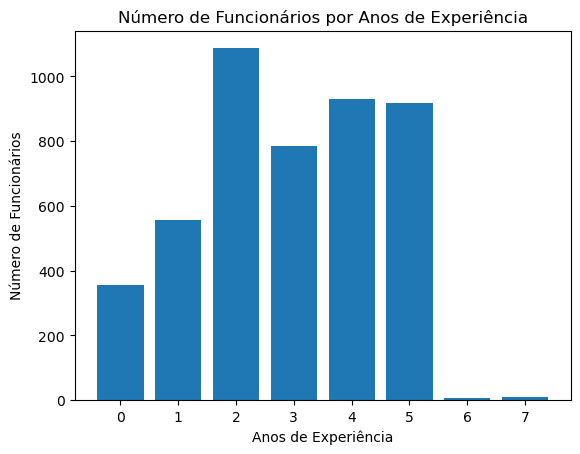

In [136]:
#Há uma diminuição no número de funcionários à medida que os anos de experiência aumentam? (técnica de groupby)
experience_counts = employe_df.groupby('ExperienceInCurrentDomain')['JoiningYear'].count()
plt.bar(experience_counts.index, experience_counts.values)
plt.xlabel('Anos de Experiência')
plt.ylabel('Número de Funcionários')
plt.title('Número de Funcionários por Anos de Experiência')
plt.show()

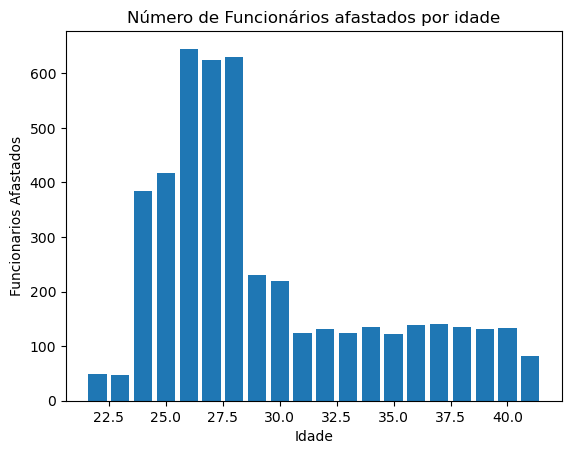

In [137]:
#Em relação a saída por um possível desgaste, como é o desejo dos funcionários? (vários gráficos podem ser inseridos para a conclusão da análise)
everBenched_byAge_counts = employe_df.groupby('Age')['EverBenched'].count()
plt.bar(everBenched_byAge_counts.index, everBenched_byAge_counts.values)
plt.xlabel('Idade')
plt.ylabel('Funcionarios Afastados')
plt.title('Número de Funcionários afastados por idade')
plt.show()

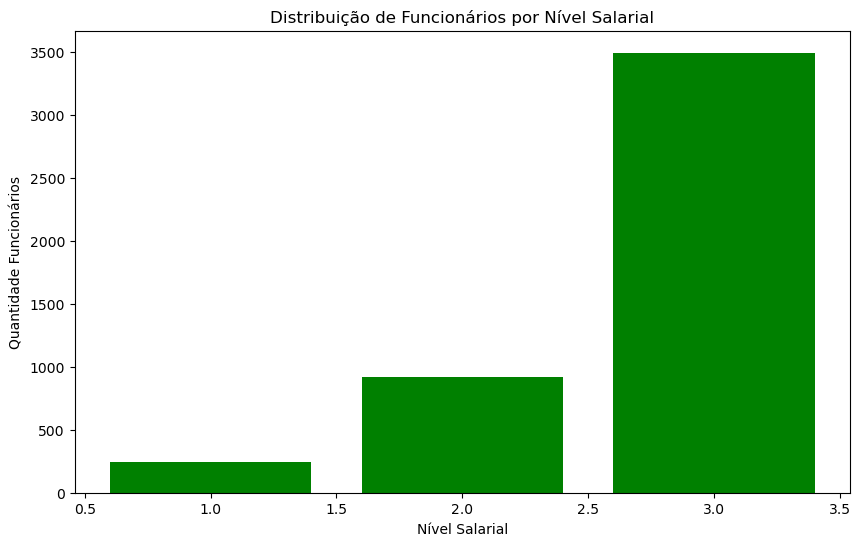

In [138]:
#Como é a distribuição dos funcionários em relação ao nível salarial? (vários gráficos podem ser inseridos para a conclusão da análise)
salary_distribution = employe_df.groupby('PaymentTier').size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
plt.bar(salary_distribution['PaymentTier'], salary_distribution['Count'], color='g')
plt.xlabel('Nível Salarial')
plt.ylabel('Quantidade Funcionários')
plt.title('Distribuição de Funcionários por Nível Salarial')
plt.show()

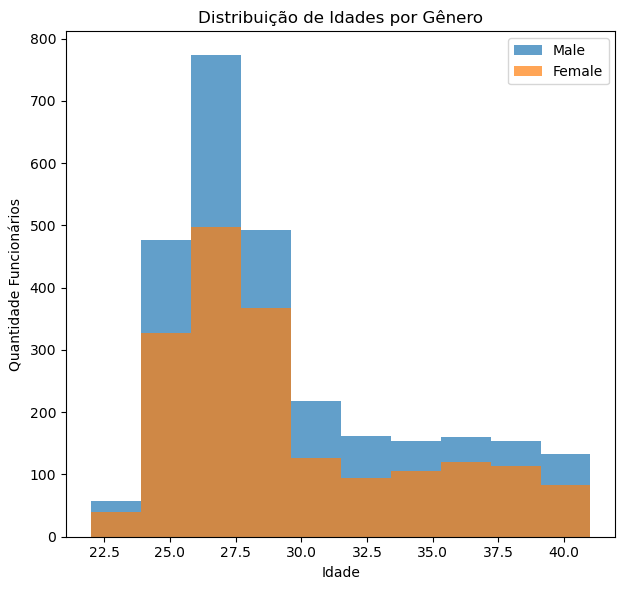

In [139]:
#A distribuição de idades entre os gêneros é uniforme e balanceada? (técnica de groupby)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for gender in employe_df['Gender'].unique():
    subset = employe_df[employe_df['Gender'] == gender]
    plt.hist(subset['Age'], bins=10, alpha=0.7, label=gender)
plt.xlabel('Idade')
plt.ylabel('Quantidade Funcionários')
plt.title('Distribuição de Idades por Gênero')
plt.legend()
plt.tight_layout()
plt.show()

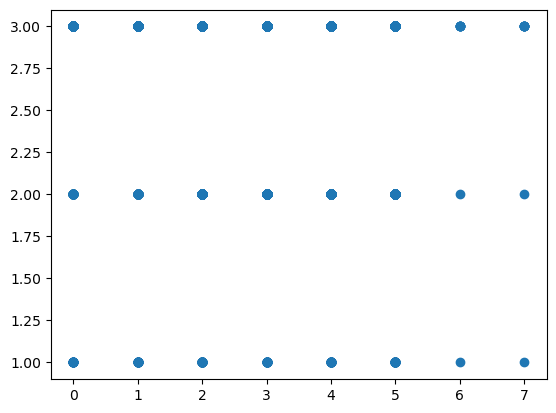

Text(0.5, 1.0, 'Distribuição Normal')

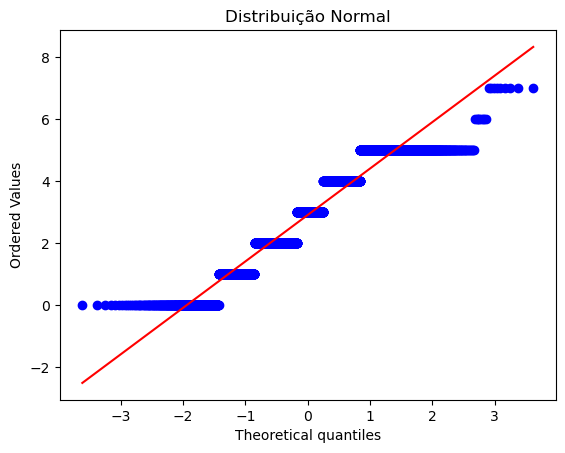

In [150]:
#Como é a relação entre o nível salarial e o tempo de experiência? (dispersão)
fig,ax = plt.subplots()
ax.scatter(employe_df['ExperienceInCurrentDomain'],employe_df['PaymentTier'])
plt.show()
stats.probplot(employe_df['ExperienceInCurrentDomain'], dist="norm", plot=plt)
plt.title("Distribuição Normal")

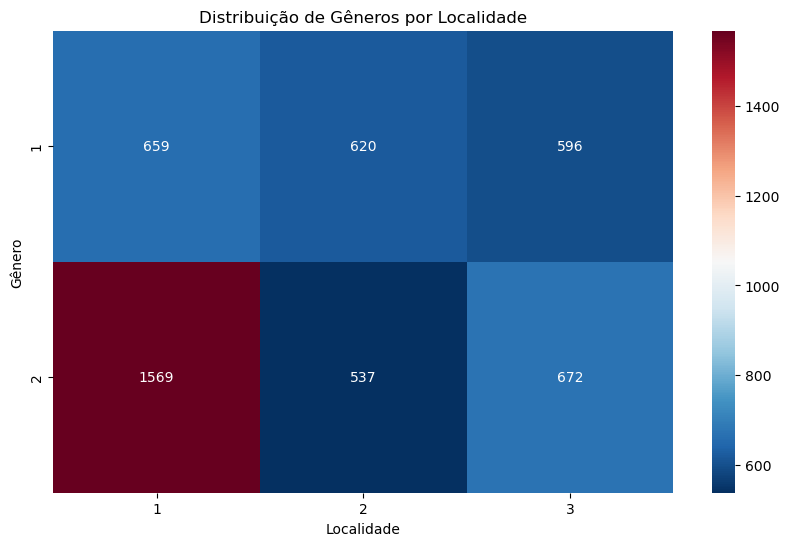

In [157]:
#Como é a distribuição dos gêneros em relação as localidades? (mapa de calor)
crosstab = pd.crosstab(employe_df['Gender'], employe_df['City'])
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, fmt="d", cmap="RdBu_r")
plt.xlabel('Localidade')
plt.ylabel('Gênero')
plt.title('Distribuição de Gêneros por Localidade')
plt.show()

C:\Users\mathe\AppData\Local\Temp\ipykernel_13088\314767677.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = employe_df.corr()


<Axes: >

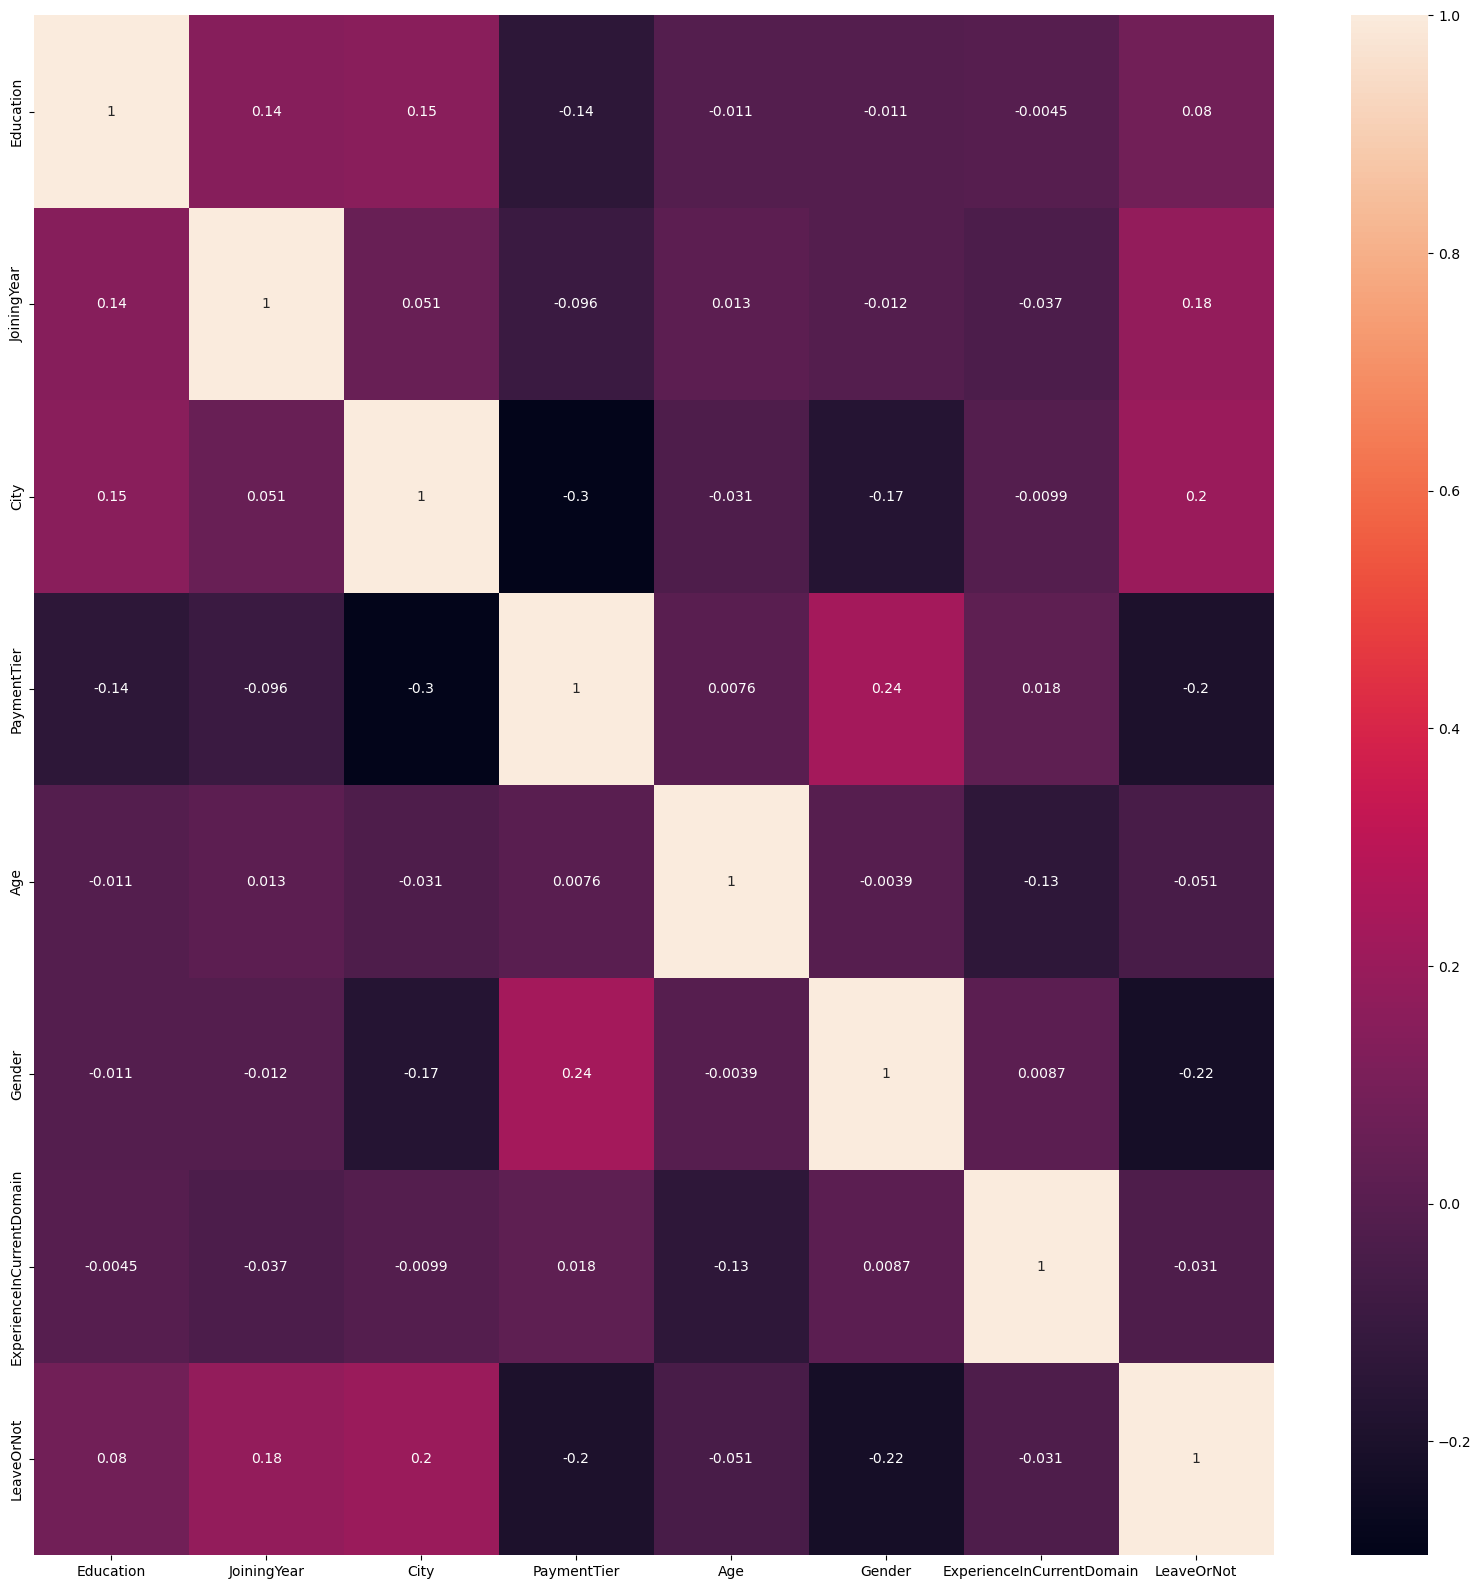

In [158]:
#Verificar o nível de correlação das variáveis. (só para as variáveis numéricas)
correlacao = employe_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlacao, annot=True)

array([[<Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'JoiningYear'}>,
        <Axes: title={'center': 'City'}>],
       [<Axes: title={'center': 'PaymentTier'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Gender'}>],
       [<Axes: title={'center': 'ExperienceInCurrentDomain'}>,
        <Axes: title={'center': 'LeaveOrNot'}>, <Axes: >]], dtype=object)

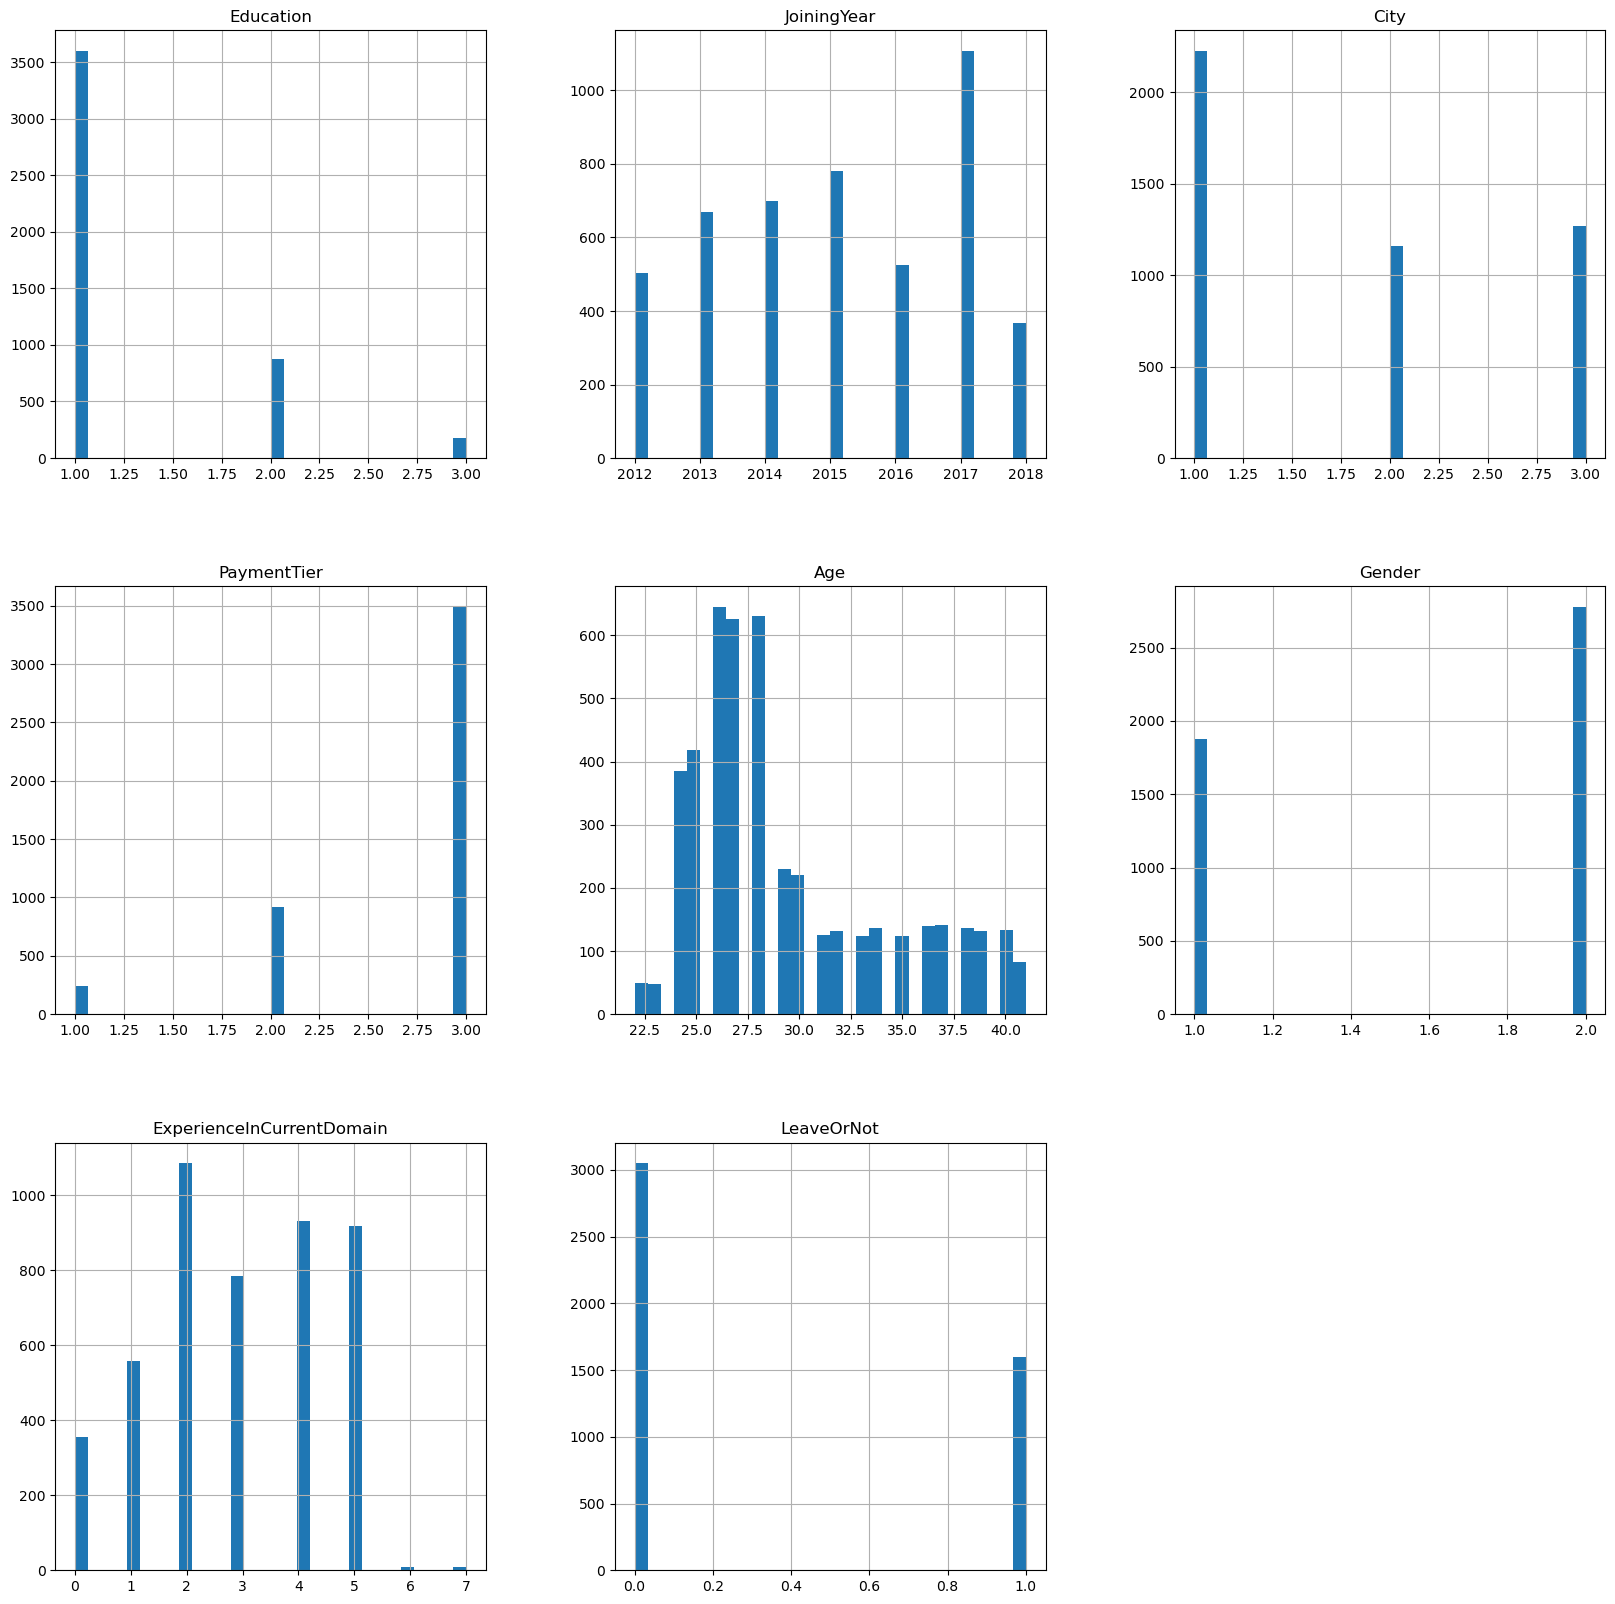

In [159]:
#Faça uma análise comparando e relacionando os níveis salariais, as idades, gênero e tempo de experiência e elabore uma conclusão a respeito.
employe_df.hist(bins=30, figsize=(20,20))

<Axes: >

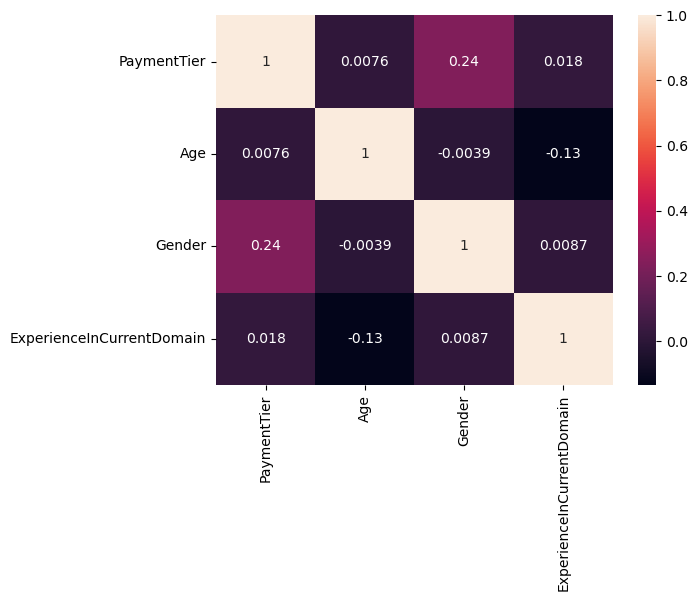

In [177]:
heatmap = employe_df[['PaymentTier', 'Age', 'Gender', 'ExperienceInCurrentDomain']].corr()
sns.heatmap(heatmap, annot=True)

<Axes: xlabel='PaymentTier', ylabel='Gender'>

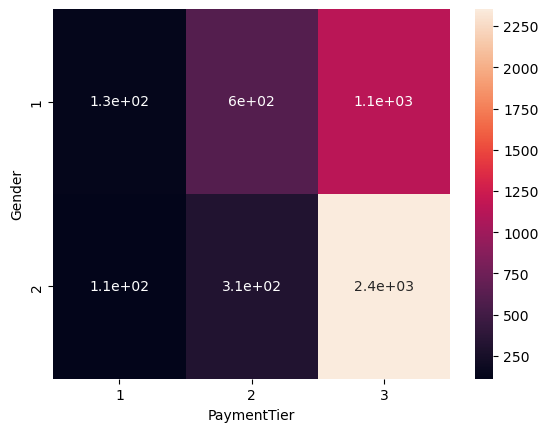

In [179]:
crosstab = pd.crosstab(employe_df['Gender'], employe_df['PaymentTier'])

sns.heatmap(crosstab, annot=True)